# 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2.2 Data Preparation

In [2]:
#!/bin/bash
!curl -L -o data.zip https://www.kaggle.com/api/v1/datasets/download/CooperUnion/cardataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  103k  100  103k    0     0  66486      0  0:00:01  0:00:01 --:--:--  194k


In [3]:
df = pd.read_csv("data.csv")

In [4]:
# Making the column consistent
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [5]:
# Returing types of objects
object_cols =  df.dtypes[df.dtypes == "object"].index.to_list()
object_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in object_cols:
    df[col] = df[col].str.lower().str.replace(" ", "-")

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1-series-m,2011,premium-unleaded-(required),335.0,6.0,manual,rear-wheel-drive,2.0,"factory-tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1-series,2011,premium-unleaded-(required),300.0,6.0,manual,rear-wheel-drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1-series,2011,premium-unleaded-(required),300.0,6.0,manual,rear-wheel-drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1-series,2011,premium-unleaded-(required),230.0,6.0,manual,rear-wheel-drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1-series,2011,premium-unleaded-(required),230.0,6.0,manual,rear-wheel-drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### 2.3 Exploratory Data Analysis

In [9]:
# Understanding the data each col
for col in df.columns:
    print(col, end="\t")
    print(df[col].unique()[:5], end="\t")
    print(df[col].nunique(), end="\n\n")

make	['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']	48

model	['1-series-m' '1-series' '100' '124-spider' '190-class']	914

year	[2011 2012 2013 1992 1993]	28

engine_fuel_type	['premium-unleaded-(required)' 'regular-unleaded'
 'premium-unleaded-(recommended)' 'flex-fuel-(unleaded/e85)' 'diesel']	10

engine_hp	[335. 300. 230. 320. 172.]	356

engine_cylinders	[ 6.  4.  5.  8. 12.]	9

transmission_type	['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']	5

driven_wheels	['rear-wheel-drive' 'front-wheel-drive' 'all-wheel-drive'
 'four-wheel-drive']	4

number_of_doors	[ 2.  4.  3. nan]	3

market_category	['factory-tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']	71

vehicle_size	['compact' 'midsize' 'large']	3

vehicle_style	['coupe' 'convertible' 'sedan' 'wagon' '4dr-hatchback']	16

highway_mpg	[26 28 27 25 24]	59

city_mpg	[19 20 18 17 16]	69

popularity	[3916 3105  819  617 1013]	48

msrp	[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

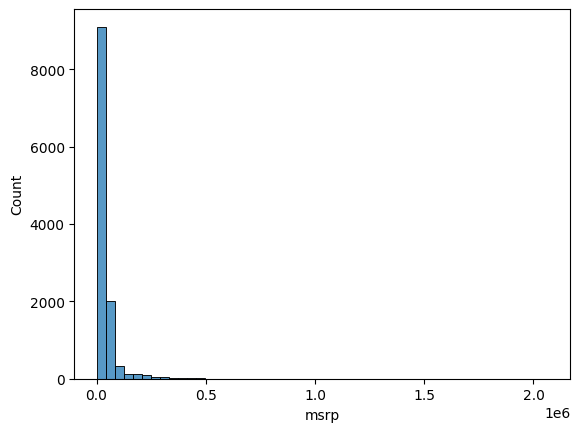

In [10]:
# Observing the distribution of prices
sns.histplot(df.msrp, bins=50)
# This type of distribution is called a long tail distribution

<Axes: xlabel='msrp', ylabel='Count'>

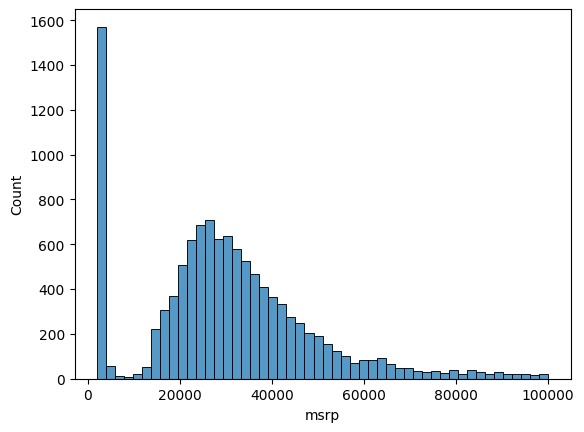

In [11]:
# Observing price distribution of prices lower than 1_000_000
sns.histplot(df.msrp[df.msrp < 1_00_000], bins=50)

In [12]:
# The presence of the tail in this distribution would cause a bias in the machine learning model. The most frequent solution is to take the logathimic distribution. it normalizes the function
values = [pow(10, i) for i in range(5)]
np.log(values)

array([0.        , 2.30258509, 4.60517019, 6.90775528, 9.21034037])

In [13]:
# In some cases, o exists and log of zero does not exist. To combat this, we increment the dataset by 1. This maintains the relationship in the dataset while retaining the log distribution
np.log1p(values)

array([0.69314718, 2.39789527, 4.61512052, 6.90875478, 9.21044037])

In [14]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

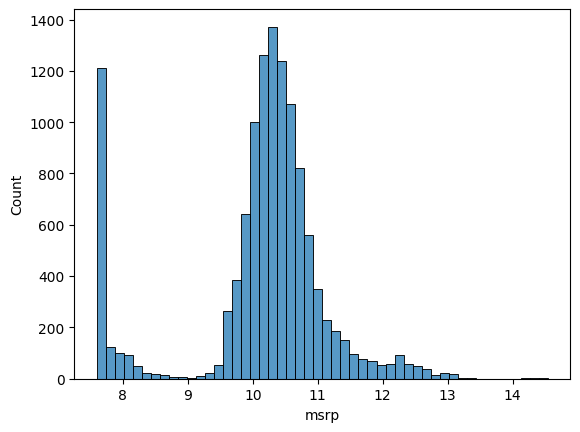

In [15]:
# Displaying the log of the dataset, we have
sns.histplot(price_logs, bins=50)
df.msrp = price_logs
# We obtained a distribution similar to the normal distribution

In [16]:
# Handling missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 2.4 Setting up Validation Framework

We take the dataset and split it into three parts
1. Part1 used for training
2. Part2 used for validation 
3. Part3 used for testing

This would be in the ratio of 3:1:1

In [17]:
n = len(df)

n_val = int(n * 1/4)
n_test = int(n * 1/4)
n_train = n - sum([n_val, n_test])

assert sum((n_val, n_test, n_train)) == n

n_val, n_test, n_train

(2978, 2978, 5958)

In [18]:
# Pointing put one of the mistakes that was made in the video
RANDOM_SEED = 42
df_shuffled = df.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)
df_shuffled.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,envoy-xl,2005,regular-unleaded,275.0,6.0,automatic,rear-wheel-drive,4.0,NaN,large,4dr-suv,18,13,549,10.298768
1,volkswagen,passat,2016,regular-unleaded,170.0,4.0,automatic,front-wheel-drive,4.0,NaN,midsize,sedan,38,25,873,10.325351
2,honda,odyssey,2016,regular-unleaded,248.0,6.0,automatic,front-wheel-drive,4.0,NaN,large,passenger-minivan,28,19,2202,10.536115
3,chevrolet,cruze,2015,regular-unleaded,138.0,4.0,manual,front-wheel-drive,4.0,NaN,midsize,sedan,36,25,1385,9.690975
4,volvo,740,1991,regular-unleaded,162.0,4.0,automatic,rear-wheel-drive,4.0,"luxury,performance",midsize,sedan,20,17,870,7.601402


In [19]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [20]:
df_train = df.iloc[idx[ :n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [21]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular-unleaded,148.0,4.0,manual,front-wheel-drive,2.0,NaN,compact,coupe,33,24,1385,9.575747
6720,toyota,matrix,2012,regular-unleaded,132.0,4.0,automatic,front-wheel-drive,4.0,hatchback,compact,4dr-hatchback,32,25,2031,9.887663
5878,subaru,impreza,2016,regular-unleaded,148.0,4.0,automatic,all-wheel-drive,4.0,hatchback,compact,4dr-hatchback,37,28,640,9.893235
11190,volkswagen,vanagon,1991,regular-unleaded,90.0,4.0,manual,rear-wheel-drive,3.0,NaN,large,passenger-minivan,18,16,873,7.601402
4554,ford,f-150,2017,flex-fuel-(unleaded/e85),385.0,8.0,automatic,four-wheel-drive,4.0,flex-fuel,large,crew-cab-pickup,21,15,5657,10.937757


In [22]:
len(df_train), len(df_val), len(df_test), n

(5958, 2978, 2978, 11914)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = df_train.msrp.to_numpy()
y_val = df_val.msrp.to_numpy()
y_test = df_test.msrp.to_numpy()

In [25]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

### 2.5 Linear Regression

In [26]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom-drophead-coupe
year                                        2015
engine_fuel_type     premium-unleaded-(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear-wheel-drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [27]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
xi = [453, 11, 86]

In [28]:
def linear_regression(xi): 
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + (w[j] * xi[j])
        
    return pred
linear_regression(xi)

12.312

In [29]:
np.expm1(12.312)

np.float64(222347.2221101062)

### 2.6 Linear Regression Vector Form

In [30]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + (xi[j] * w[j])
    
    return res

In [31]:
def linear_regression(xi):
    return w0 + dot(xi, w)
linear_regression(xi)

12.312000000000001

In [32]:
def linear_regression(xi):
    w_new = [w0] + w
    x_new = [1] + xi
    return dot(x_new, w_new)
linear_regression(xi)

12.312

In [33]:
# The easy part is the matrix multiplication while the hard part is the creating the weights

x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [34]:
w_new = [w0] + w

In [35]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

### 2.7 Training a linear regression model

In [36]:
X = np.array(
    [
        [148, 24, 1385],
        [132, 25, 2031],
        [453, 11, 86],
        [158, 24, 185],
        [172, 25, 201],
        [413, 11, 86],
        [38, 54, 185],
        [142, 25, 431],
        [453, 31, 86]
    ]
)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [37]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
X = np.column_stack([ones, X])

In [39]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [40]:
XTX = X.T.dot(X) # Gram Matrix

In [41]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [42]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [43]:
w

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [44]:
def train_linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [45]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [46]:
y = [12.38 , 13.552, 12.312]
y

[12.38, 13.552, 12.312]

### 2.8 Carprice baseline model

In [47]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [48]:
base_col = (df_train.dtypes[df_train.dtypes == "float64"] + df_train.dtypes[df.dtypes == "int64"]).index
base_col = list(filter(lambda x: not(x in ['number_of_doors','year']), base_col.to_list()))
base_col

['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg', 'popularity']

In [49]:
X_train = df_train[base_col].values

In [50]:
X_train = df_train[base_col].fillna(0).values

In [51]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.432534279522606),
 array([-5.51544285e-03, -1.28317085e-01,  9.61352225e-03,  4.26409122e-02,
        -1.23705347e-05]))

In [52]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

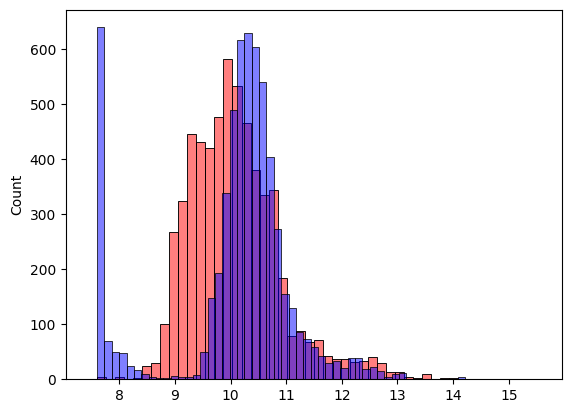

In [53]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

### 2.9 Root Mean Square Error (RMSE)

In [54]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    
    return np.sqrt(mse)

In [55]:
rmse(y_train, y_pred)

np.float64(0.7559191896261817)

### 2.10 Validating the model

In [56]:
def prepare_X(df):
    
    df_num = df[base_col]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [57]:
X_train = prepare_X(df_train)
X_train

array([[  24.,    4.,  148.,   33., 1385.],
       [  25.,    4.,  132.,   32., 2031.],
       [  28.,    4.,  148.,   37.,  640.],
       ...,
       [  20.,    6.,  260.,   27., 2009.],
       [  15.,    6.,  141.,   22., 1013.],
       [  20.,    6.,  256.,   28.,  640.]], shape=(5958, 5))

In [58]:
w0, w = train_linear_regression(X_train, y_train)

In [59]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [60]:
rmse(y_val, y_pred)

np.float64(0.7898854297413745)

### 2.11 Simple feature engineering

In [61]:
def prepare_X(df):
    df = df.copy()
    
    df["age"] = 2017 - df.year
    features = base_col + ["age"]
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [62]:
X_train  = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5220633206723242)

<Axes: ylabel='Count'>

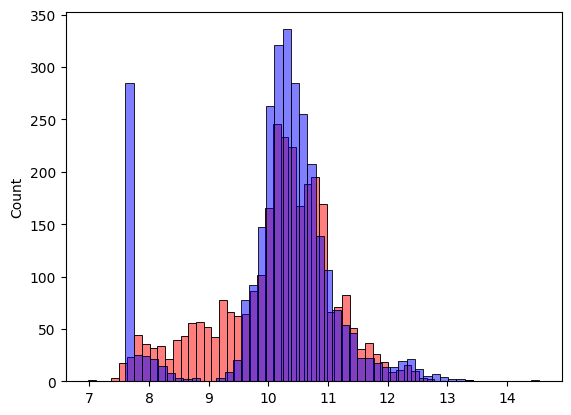

In [63]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50)

### 2.12 Categorical variables

In [64]:
for v in df_train.number_of_doors.unique():
    try:
        df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype("int")
    except Exception as e:
        pass

In [65]:
makes  = ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [66]:
num_doors = [2, 3, 4]
num_doors

[2, 3, 4]

In [67]:
def prepare_X(df):
    df = df.copy()
    features = base_col.copy()
    
    df["age"] = 2017 - df.year
    features.append('age')
    
    for v in num_doors:
        name = 'num_doors_%s' % v
        df[name] = (df.number_of_doors == v).astype("int")
        features.append(name)
    
    for v in makes:
        name = 'make_%s' % v
        df[name] = (df.make == v).astype("int")
        features.append(name)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [68]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'num_doors_2.0',
       'num_doors_4.0', 'num_doors_3.0', 'num_doors_nan'],
      dtype='object')

In [69]:
X_train  = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5288838338955232)

In [70]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2.0          int64
num_doors_4.0          int64
num_doors_3.0          int64
num_doors_nan          int64
dtype: object

In [71]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
]

In [72]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
    
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular-unleaded',
  'premium-unleaded-(required)',
  'premium-unleaded-(recommended)',
  'flex-fuel-(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front-wheel-drive',
  'rear-wheel-drive',
  'all-wheel-drive',
  'four-wheel-drive'],
 'market_category': ['crossover',
  'flex-fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr-suv',
  'coupe',
  'convertible',
  '4dr-hatchback']}

In [73]:
def prepare_X(df):
    df = df.copy()
    features = base_col.copy()
    
    df["age"] = 2017 - df.year
    features.append('age')
    
    for v in num_doors:
        name = 'num_doors_%s' % v
        df[name] = (df.number_of_doors == v).astype("int")
        features.append(name)
        
    for c, values in categories.items():
        for v in values:
            name = '%s_%s' % (c, v)
            df[name] = (df.make == v).astype("int")
            features.append(name)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [74]:
X_train  = prepare_X(df_train)
X_train[X_train.shape[0]-1][X_train.shape[1]-1]

np.float64(0.0)

In [75]:
w0, w = train_linear_regression(X_train, y_train)
# This error occured due to the non-existence of the inverse of the matrix
# one way to solce this is by adding a number to the diagonal. This process is called regularization. By displacing the diagonal of a matrix, we prevent cols or rows to be the same
# X_val = prepare_X(df_val)
# y_pred = w0 + X_val.dot(w)

# rmse(y_val, y_pred)

LinAlgError: Singular matrix

### 2.13 Regularization

In [76]:
def train_linear_regression_reg(X, y, r=0.001):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [77]:
X_train  = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5286000681764479)

### 2.14 Tunning the model

In [78]:
for t in range(10):
    r = 10 ** -t
    X_train  = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(t, w0, score)

0 9.052700833521198 0.5179213280389647
1 11.103687321405356 0.5264051073910382
2 11.526457344468726 0.5286000681764479
3 11.573350168969913 0.5288550436581446
4 11.578090788113055 0.5288809506756887
5 11.578565369135713 0.52888354553255
6 11.57861283246768 0.5288838050623662
7 11.578617578834276 0.5288838310139707
8 11.578618053540103 0.5288838336132529
9 11.578618101015236 0.5288838338733101


### 2.15 Using the model

In [79]:
df_full_train = pd.concat([df_train, df_val])

In [80]:
df_full_train = df_full_train.reset_index(drop=True)

In [81]:
X_full_train = prepare_X(df_full_train)

In [82]:
X_full_train

array([[ 24.,   4., 148., ...,   0.,   0.,   0.],
       [ 25.,   4., 132., ...,   0.,   0.,   0.],
       [ 28.,   4., 148., ...,   0.,   0.,   0.],
       ...,
       [ 23.,   4., 113., ...,   0.,   0.,   0.],
       [ 15.,   6., 160., ...,   0.,   0.,   0.],
       [ 19.,   6., 278., ...,   0.,   0.,   0.]], shape=(8936, 41))

In [83]:
y_full_train = np.concatenate([y_train, y_val])

In [84]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0

np.float64(10.720429218030674)

In [85]:
w

array([ 1.28125230e-02,  9.73509972e-02,  3.30129005e-03, -7.02902852e-03,
       -2.89432095e-05, -9.60723620e-02, -1.26294065e+00, -1.47230629e+00,
       -1.31221799e+00, -2.01157345e-01, -6.60692190e-02,  2.41083096e-02,
       -2.84062200e-01, -2.69799779e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [86]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.506061459394739)

In [87]:
car = df_test.iloc[20].to_dict()
car

{'make': 'saab',
 'model': '9-3',
 'year': 2011,
 'engine_fuel_type': 'premium-unleaded-(recommended)',
 'engine_hp': 210.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front-wheel-drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 31,
 'city_mpg': 21,
 'popularity': 376}

In [88]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,saab,9-3,2011,premium-unleaded-(recommended),210.0,4.0,manual,front-wheel-drive,4.0,luxury,midsize,sedan,31,21,376


In [89]:
X_small = prepare_X(df_small)

In [90]:
y_pred = w0 + X_small.dot(w)

In [91]:
y_pred

array([9.95473241])

In [92]:
np.expm1(y_pred[0])

np.float64(21050.6117926744)

In [93]:
np.expm1(y_test[20])

np.float64(28900.0)

In [94]:
rmse(y_test[20], y_pred[0])

np.float64(0.3168990696755447)